# Redes Complejas
## Notas de clase
por Felipe Contreras

## Introducción a la Teoría de Gráficas

Cuando observamos un fenómeno de la naturaleza, por lo general la ciencia nos enseña a descomponerlo en sus componentes. Por ejemplo, si en un lago observamos la cantidad de animales y plantas que ahí se encuentran y como interactúan entre si, nos podemos poner a descernir la biología de estos seres, pero de esta forma no podríamos entender la complejidad de relaciones e interacciones que tienen entre si. Así por ejemplo, la biología no podría decirnos que si una especie de pez se extingue, los animales que se alimentaban de él o sus productos residuales, también lo harán. Así mismo, los animales o plantas que esta especie consumía, se reproducirán quizás al mismo ritmo, pero ahora sin una especie que reduzca su número.

Como hemos visto, esta puede formar parte de un Sistema Complejo y una de las herramientas para estudiarlo es las redes, en este caso *tróficas* (de alimentación).

Veamos un ejemplo muy simple de esta red trófica. Si el Pez A se come al Pez B y al C, éstos a su vez comen plantas tipos D y E respectivamente, la red podría representarse así:

{'Pez A': <matplotlib.text.Text at 0x11a60aa90>,
 'Pez B': <matplotlib.text.Text at 0x11aaab390>,
 'Pez C': <matplotlib.text.Text at 0x11aaabcc0>,
 'Planta D': <matplotlib.text.Text at 0x11aaabeb8>,
 'Planta E': <matplotlib.text.Text at 0x118c4c898>,
 'Sol': <matplotlib.text.Text at 0x11aaeae48>}

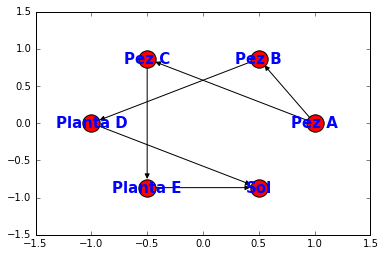

In [41]:
"la biblioteca Networkx permite introducir gráficas y digráficas, y permite dibujarlas usando matplotlib."
import networkx as nx

lago = nx.DiGraph()  # definimos una nueva digráfica
"Nodos."
a = "Pez A"
b = "Pez B"
c = "Pez C"
d = "Planta D"
e = "Planta E"
s = "Sol"
"Añadimos las aristas."
lago.add_edges_from([(a,b),(a,c),(b,d),(c,e),(d,s),(e,s)])
"un 'layout' es la disposición que tendrán los nodos al pintarse."
pos=nx.circular_layout(lago)
"dibuja la digráfica, nota que no importamos matplotlib, aunque si lo debes tener instalado."
nx.draw_networkx_nodes(lago, pos=pos)  # dibujamos nodos
nx.draw_networkx_edges(lago, pos=pos)  # y aristas. Se pueden dibujar juntas con nx.draw, pero así tiene sus ventajas.
nx.draw_networkx_labels(lago, pos=pos, font_size=15, font_weight='bold', font_color='blue') # no siempre requeriremos etiquetas

El objeto matemático detrás de las redes es la **gráfica**. La gráfica *G*, escrita *G(V, E)*, matemáticamente se expresa como dos conjuntos. El primero llamado *V* contiene los **nodos** de la gráfica. En nuestro ejemplo, los peces, plantas y el sol. El segundo conjunto consiste de *parejas* de nodos llamadas **aristas**.

A veces no importa cual elemento de la pareja va primero y cual después, como por ejemplo en una gráfica de "conocidos", *Juan* "conoce" a *Pedro* y por lo tanto *Pedro* también "conoce" a *Juan*. Estas son gráficas y aristas *no dirigidas*. Sin embargo, se tienen también casos como en nuestro ejemplo, en el que la planta normalmente no come peces, sino al revés. Así las aristas serán *dirigidas* y la gráfica se le llamará *digráfica* (o *gráfica dirigida*).

Así, si el Pez A se come a los peces B y C, estas aristas las podemos escribir como *(a,b)* y *(a,c)*. Es este caso diremos que los nodos *b* y *c* son **vecinos** de *a* (en este caso, *a* **no** es vecino de *b* ni de *c*). También diremos que *a* y *b* son **adyacentes** y que *a* y *b* son **extremos** de la arista *(a,b)*.

Hablaremos en adelante de gráficas en general, ya sea dirigidas o no. Una gráfica puede tener *pesos* en sus nodos o aristas, representanto por ejemplo, costos, colores, etc.

Un **camino** o **ruta** es una sucesión de nodos vecinos y las aristas que tienen entre ellos. Por ejemplo *[a, (a,b), b, (b,d), d, (d,s), s]*. Este es un camino de *a* a *s* y su **longitud** es el número de aristas que tiene (puede verse como el *número de brincos*). Si es *la ruta más corta*, o sea, la de menor longitud que podemos encontrar, a su longitud se le llamará **distancia**. Así la distancia de *a* a *s*, es 3, y se escribe *d(a,s)=3*. Observa que en una digráfica, no puedes usar aristas en "sentido contrario", en nuestro ejemplo, este camino *no es válido*: *[(b, (b,a), a, (a,c), c]*. De hecho observa que no habría forma de llegar de *b* a *c* ni de *c* a *b*. Se dice que *b* y *c* están **desconectados** y la digráfica es **disconexa**. Las gráficas no dirigidas podrían ser disconexas, si tiene al menos dos nodos que no se puede llegar de uno al otro con un camino.

Un camino en una red trófica se le suele llamar, por supuesto, "cadena alimenticia".

Veamos otra red de ejemplo.

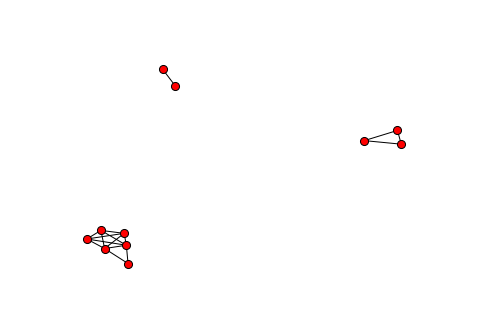

In [58]:
amigos = nx.Graph()
amigos.add_edges_from([(0,1),(0,2),(1,2)])
amigos.add_edges_from([(3,4),(4,5),(5,6),(4,6),(3,6),(4,7),(5,7),(6,7),(4,8),(5,8),(6,8),(7,8)])
amigos.add_edges_from([(10,9)])
nx.draw(amigos, node_size=65)

Aunque no lo creas, esta es *una sola gráfica*, sólo que es disconexa. Le podemos distinguir tres **componentes conexas**, pero para definir bien esto que se observa de manera intuitiva, hay que decir que una **subgráfica** es una gráfica nueva definida a partir de otra, donde:

* sus nodos son un *subconjunto* de los nodos de la otra,
* sus aristas son también un subconjunto de las aristas de la otra, 
* *además*, ambos extremos de cada arista de la subgráfica deben ser nodos de ella

Así que una *componente conexa* de una gráfica, es aquella subgráfica *conexa* que tiene la mayor cantidad de nodos y la mayor cantidad de aristas (es decir, los nodos y todas las aristas entre ellos tenía la original).

La **descomposición conexa** en donde se distinguen las componentes conexas de una gráfica es útil para, por ejemplo, saber "con quien contamos" para un trabajo, "hasta donde llega nuestra influencia", etc.

Si se permite que entre dos nodos hay más de una arista (*paraleleas*) o los extremos de una arista coinciden en un sólo nodo (*bucle*), la gráfica se considera **no simple**. Por lo general hablaremos sólo de gráficas simples.

Pasemos ahora a construir ejemplos de gráficas conocidas en el medio y que tienen utilidad diversa.

* cadena
* malla
* árbol
* ciclo
* estrella
* completa
* platónica
* hipercubos
* niveles
* Erdos-Renyi
* Watts-Strogats
* Barabasi-Albert

Ejercicio: Define camino o ruta en términos de sub-gráfica

## Medidas de Centralidad

Definiremos las siguientes medidas:

* grado (grado promedio)
* radio
* diámetro
* máxima isla
* clan
* conectividad
* intermediación
* tráfico